### V.A. Метод Опорных Векторов (SVM): Линейный случай

**Основная идея:** SVM – это алгоритм машинного обучения, используемый преимущественно для **классификации** (но также и для регрессии). Для линейно разделимых данных SVM ищет **оптимальную разделяющую гиперплоскость**, которая не просто разделяет классы, но и имеет **максимальный зазор (margin)** до ближайших точек каждого класса.

**Ключевые понятия:**

1.  **Разделяющая гиперплоскость:** Линейная граница, разделяющая классы. В n-мерном пространстве задается уравнением:
    `w · x + b = 0`
    *   `w`: Вектор весов (нормаль к гиперплоскости).
    *   `x`: Вектор признаков.
    *   `b`: Смещение (bias).
    *   `·`: Скалярное произведение.

2.  **Зазор (Margin):** Расстояние между разделяющей гиперплоскостью и ближайшими к ней точками (опорными векторами) каждого класса. SVM стремится **максимизировать** этот зазор. Ширина зазора равна `2 / ||w||`. Максимизация зазора эквивалентна минимизации `||w||^2`.

3.  **Опорные векторы (Support Vectors):** Точки обучающей выборки, лежащие *на границах зазора*. Именно они определяют положение оптимальной гиперплоскости. Остальные точки не влияют на её положение.

**Преимущества максимального зазора:**

*   **Лучшая обобщающая способность:** Модель более устойчива к новым данным и менее склонна к переобучению (особенно для линейно разделимых данных).

**Математическая формулировка:**

**1. Жесткий зазор (Hard Margin SVM):**
Применяется, если данные **строго линейно разделимы**.

*   **Цель:** Минимизировать `(1/2) ||w||^2` (эквивалентно максимизации зазора).
*   **Ограничения:** Все точки должны быть классифицированы правильно и находиться *вне* зазора.
    `y_i * (w · x_i + b) >= 1` для всех точек `(x_i, y_i)`, где `y_i ∈ {+1, -1}`.

**2. Мягкий зазор (Soft Margin SVM):**
Применяется для **нелинейно разделимых данных** или данных с шумом/выбросами. Допускает попадание точек внутрь зазора или даже их неправильную классификацию.

*   **Слабительные переменные (Slack Variables):** Вводятся переменные `ξ_i >= 0` для каждой точки, измеряющие степень нарушения зазора (`ξ_i = max(0, 1 - y_i * (w · x_i + b))`).
*   **Функция ошибки Hinge Loss:** Штрафует за неправильную классификацию (`y_i * f(x_i) <= 0`) и за точки внутри зазора (`0 < y_i * f(x_i) < 1`). `L_hinge = max(0, 1 - y_i * f(x_i))`.
*   **Цель:** Найти компромисс между максимизацией зазора и минимизацией суммарной ошибки.
    **Минимизировать:** `(1/2) ||w||^2 + C * Σ ξ_i`
    *   `C > 0`: Параметр **регуляризации**. Контролирует баланс:
        *   **Маленький `C`**: Больший зазор, допускается больше ошибок (мягче граница).
        *   **Большой `C`**: Меньший зазор, меньше ошибок (жестче граница).
*   **Ограничения:**
    *   `y_i * (w · x_i + b) >= 1 - ξ_i` для всех `i`.
    *   `ξ_i >= 0` для всех `i`.

**Визуализация влияния `C` (Пример):**

*Наблюдение:* С увеличением `C` SVM старается классифицировать каждую точку правильно, что может привести к меньшему зазору и потенциальному переобучению.

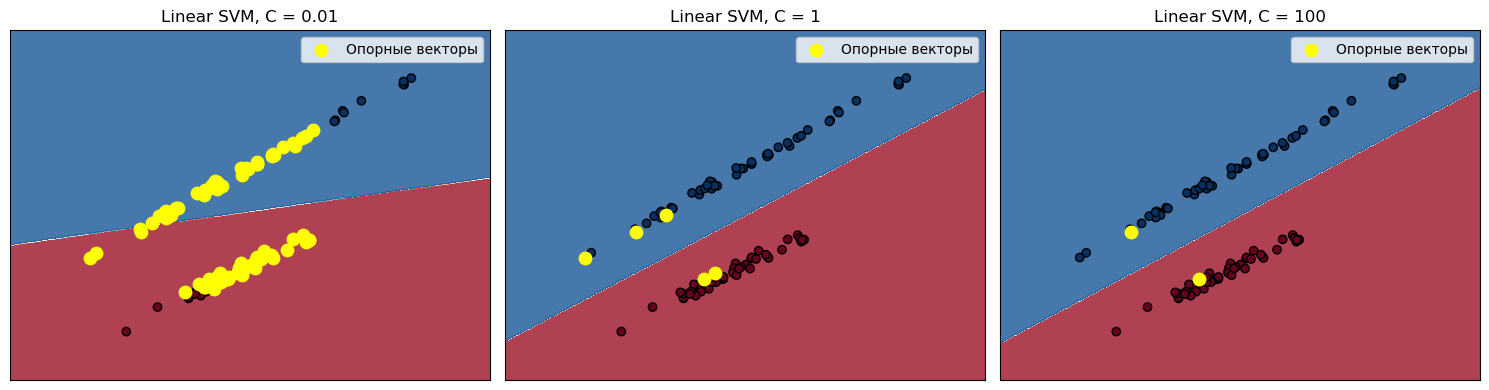

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 


# Генерируем данные
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# Функция отрисовки
def plot_svm_decision_boundary(model, X, y, ax, title=None):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='k')
    sv = model.support_vectors_
    ax.scatter(sv[:, 0], sv[:, 1], c='yellow', s=80, marker='o', label='Опорные векторы')
    if title:
        ax.set_title(title)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.legend()

# Обучаем и рисуем SVM с разными C
C_values = [0.01, 1, 100]
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 4))

for C, ax in zip(C_values, axes):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    plot_svm_decision_boundary(model, X, y, ax, title=f'Linear SVM, C = {C}')

plt.tight_layout()
plt.show()

*Наблюдение:* С увеличением `C` SVM старается классифицировать каждую точку правильно, что может привести к меньшему зазору и потенциальному переобучению.

---

### VII.B. Нелинейный SVM и Ядра (Kernels)

**Проблема:** Линейный SVM неэффективен, если данные **нелинейно разделимы**.

**Идея:** Отобразить данные в **пространство признаков более высокой размерности** `Φ(x)`, где они *могут* стать линейно разделимыми. Затем применить линейный SVM в этом новом пространстве.

**Проблема отображения:** Явное вычисление `Φ(x)` и скалярных произведений `Φ(xᵢ) · Φ(xⱼ)` в пространстве высокой (возможно, бесконечной) размерности может быть вычислительно очень затратным или невозможным.

**Решение: Ядерный трюк (Kernel Trick):**
Использование **ядерной функции (ядра) K(xᵢ, xⱼ)**, которая вычисляет скалярное произведение в пространстве высокой размерности *без явного отображения* данных:
`K(xᵢ, xⱼ) = Φ(xᵢ) · Φ(xⱼ)`

**Популярные ядра:**

1.  **Линейное (Linear):** `K(x, z) = x · z`
    *   Эквивалентно обычному линейному SVM.
    *   Хорошо для данных с большим количеством признаков (текст).

2.  **Полиномиальное (Poly):** `K(x, z) = (γ * (x · z) + r)^d`
    *   `d`: степень полинома, `γ`, `r`: другие параметры.
    *   Строит полиномиальные границы.

3.  **Радиально-базисное (RBF) / Гауссово:** `K(x, z) = exp(-γ * ||x - z||²)`
    *   `γ > 0`: параметр ядра (влияет на "ширину" влияния каждой точки).
    *   Очень гибкое, строит сложные нелинейные границы. Часто хороший выбор по умолчанию.

4.  **Сигмоидное (Sigmoid):** `K(x, z) = tanh(γ * (x · z) + r)`
    *   Иногда используется, но менее популярен, чем RBF/Poly.

**Преимущества ядер:**

*   **Вычислительная эффективность:** Позволяют работать в пространствах высокой размерности без явных вычислений.
*   **Гибкость:** Позволяют строить разнообразные нелинейные границы.

**Выбор ядра и параметров:** Обычно выполняется эмпирически с помощью **кросс-валидации**.

**Визуализация разных ядер (Пример):**

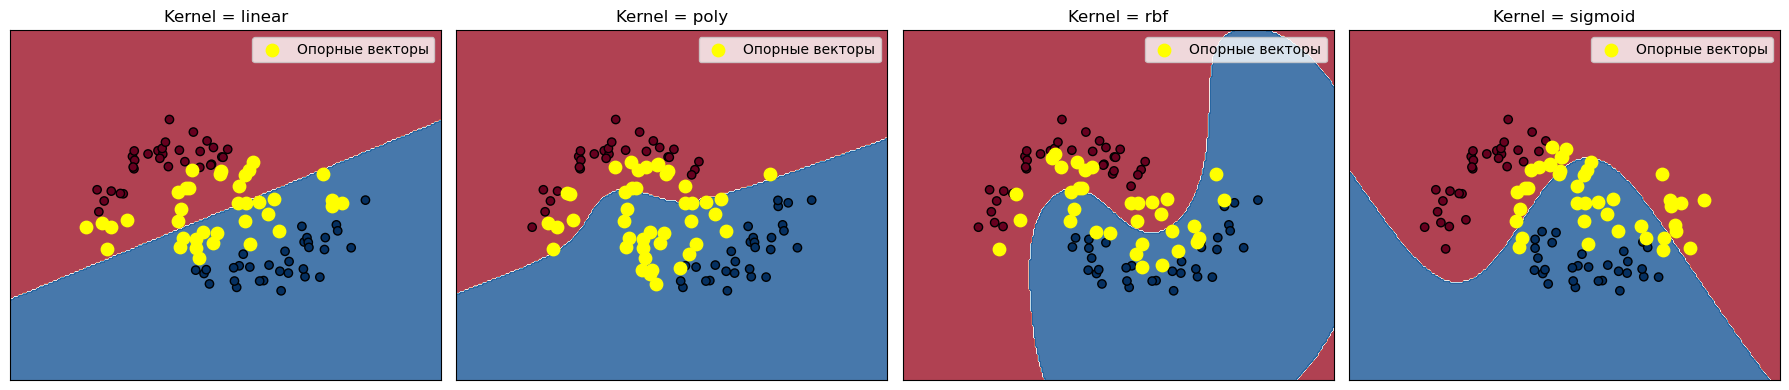

In [3]:
# Генерируем нелинейные данные (луны)
X_moons, y_moons = datasets.make_moons(n_samples=100, noise=0.15, random_state=42)

# Обучаем и рисуем SVM с разными ядрами
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
fig, axes = plt.subplots(1, len(kernels), figsize=(18, 4))

for kernel, ax in zip(kernels, axes):
    # Для sigmoid gamma='auto' может работать лучше 'scale' на некоторых данных
    gamma_setting = 'auto' if kernel == 'sigmoid' else 'scale'
    model = SVC(kernel=kernel, C=1.0, gamma=gamma_setting, degree=3, coef0=0.0) # degree/coef0 для poly/sigmoid
    model.fit(X_moons, y_moons)
    plot_svm_decision_boundary(model, X_moons, y_moons, ax, title=f'Kernel = {kernel}')

plt.tight_layout()
plt.show()

*Наблюдение:* Линейное ядро не справляется с "лунами". Полиномиальное и особенно RBF ядра строят подходящие нелинейные границы.

---

### VII.C. Двойственная задача SVM

**Мотивация:** Переход от **прямой задачи (Primal Problem)** к **двойственной (Dual Problem)** дает преимущества:

1.  **Эффективность:** Часто вычислительно выгоднее, особенно при `число признаков > число объектов`.
2.  **Естественное использование ядер:** В двойственной задаче данные появляются только в виде скалярных произведений `xᵢ · xⱼ`, которые легко заменяются на ядра `K(xᵢ, xⱼ)`.
3.  **Разреженность:** Решение выражается через опорные векторы, что экономит ресурсы при предсказании.

**Формулировка двойственной задачи (Soft Margin SVM с ядром):**

**Максимизировать:** `L_D(α) = Σ α_i - (1/2) Σ Σ α_i α_j y_i y_j K(x_i, x_j)`

**При ограничениях:**
*   `0 <= α_i <= C` для всех `i`
*   `Σ α_i y_i = 0`

*   `α_i`: Двойственные переменные (множители Лагранжа), по одной на каждую точку `x_i`.
*   `K(x_i, x_j)`: Ядерная функция.

**Связь с прямой задачей и опорными векторами:**

*   **Опорные векторы:** Это точки `x_i`, для которых `α_i > 0`. Только они влияют на границу. Для остальных точек `α_i = 0`.
*   **Веса `w` (для лин. ядра):** `w = Σ α_i y_i x_i` (сумма по опорным векторам).
*   **Смещение `b`:** Вычисляется с использованием опорных векторов.

**Предсказание для нового объекта `x_new`:**
`f(x_new) = Σ α_i y_i K(x_i, x_new) + b`
(Сумма также только по опорным векторам).

**Алгоритм обучения (например, SMO):** Находит оптимальные `α_i`, решая двойственную задачу.

---

### VII.C. Двойственная задача SVM

**Мотивация:** Переход от **прямой задачи (Primal Problem)** к **двойственной (Dual Problem)** дает преимущества:

1.  **Эффективность:** Часто вычислительно выгоднее, особенно при `число признаков > число объектов`.
2.  **Естественное использование ядер:** В двойственной задаче данные появляются только в виде скалярных произведений `xᵢ · xⱼ`, которые легко заменяются на ядра `K(xᵢ, xⱼ)`.
3.  **Разреженность:** Решение выражается через опорные векторы, что экономит ресурсы при предсказании.

**Формулировка двойственной задачи (Soft Margin SVM с ядром):**

**Максимизировать:** `L_D(α) = Σ α_i - (1/2) Σ Σ α_i α_j y_i y_j K(x_i, x_j)`

**При ограничениях:**
*   `0 <= α_i <= C` для всех `i`
*   `Σ α_i y_i = 0`

*   `α_i`: Двойственные переменные (множители Лагранжа), по одной на каждую точку `x_i`.
*   `K(x_i, x_j)`: Ядерная функция.

**Связь с прямой задачей и опорными векторами:**

*   **Опорные векторы:** Это точки `x_i`, для которых `α_i > 0`. Только они влияют на границу. Для остальных точек `α_i = 0`.
*   **Веса `w` (для лин. ядра):** `w = Σ α_i y_i x_i` (сумма по опорным векторам).
*   **Смещение `b`:** Вычисляется с использованием опорных векторов.

**Предсказание для нового объекта `x_new`:**
`f(x_new) = Σ α_i y_i K(x_i, x_new) + b`
(Сумма также только по опорным векторам).

**Алгоритм обучения (например, SMO):** Находит оптимальные `α_i`, решая двойственную задачу.

---

### VII.D. Практический пример: SVM на данных Iris

Применим SVM для классификации ирисов с разными ядрами.

In [4]:
# 1. Загрузка и подготовка данных
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Масштабирование признаков (Очень важно для SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Используем тот же scaler!

print("Данные подготовлены и масштабированы.")

# 3. Обучение и оценка SVM с разными ядрами

# Линейное ядро
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear = linear_svm.predict(X_test_scaled)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {acc_linear:.4f}")

# RBF ядро
rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42) # gamma='scale' хорошее начало
rbf_svm.fit(X_train_scaled, y_train)
y_pred_rbf = rbf_svm.predict(X_test_scaled)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel):   {acc_rbf:.4f}")

# Полиномиальное ядро
poly_svm = SVC(kernel='poly', C=1.0, degree=3, random_state=42) # degree=3 стандартно
poly_svm.fit(X_train_scaled, y_train)
y_pred_poly = poly_svm.predict(X_test_scaled)
acc_poly = accuracy_score(y_test, y_pred_poly)
print(f"Accuracy (Poly Kernel):  {acc_poly:.4f}")

# Вывод: Сравнение точности разных ядер на данных Iris.
# На этих данных RBF и Линейное ядро показывают схожую высокую точность.
# Полиномиальное ядро немного уступает.
# Важно: Результаты могут зависеть от параметров C, gamma, degree.
# Для выбора лучшей модели обычно используют кросс-валидацию и подбор гиперпараметров.

Данные подготовлены и масштабированы.
Accuracy (Linear Kernel): 0.9111
Accuracy (RBF Kernel):   0.9333
Accuracy (Poly Kernel):  0.8667


---